<a href="https://colab.research.google.com/github/ErikTeixeira/machine-learning/blob/main/machile_learning_classifica%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Atualizar a biblioteca seaborn   -  para usar o scatterplot
!pip install seaborn==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# unfinished -> 1  =  não finalizado

a_renomear = {
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
# trocar o 1 pelo 0 na não finalizado  -  para criar uma nova coluna

troca = {
    0 : 1,
    1 : 0
}

dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

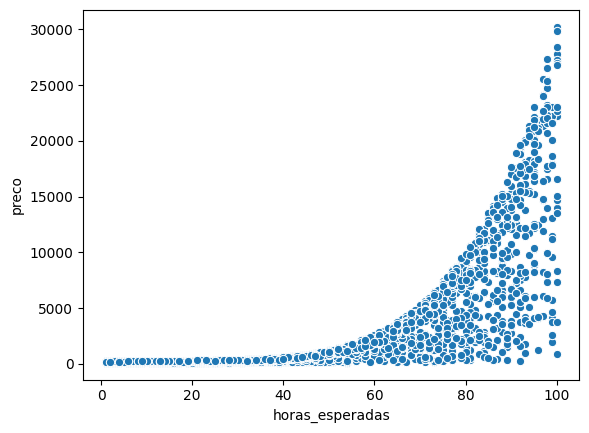

In [5]:
# Desenho dos dados

import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y = "preco", data = dados)


<Axes: xlabel='horas_esperadas', ylabel='preco'>

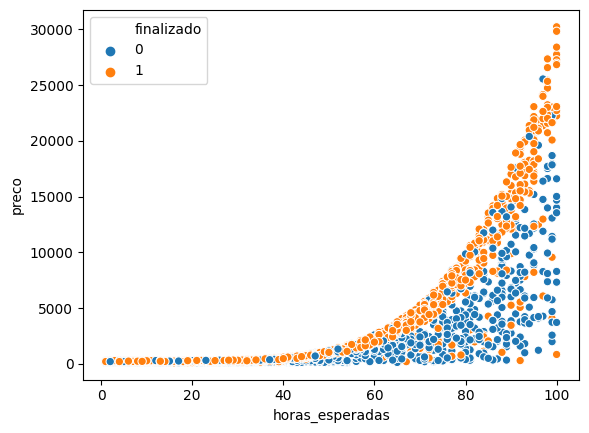

In [6]:
# Pintar a bolinha de uma cor diferente se finalizou ou não

sns.scatterplot(x = "horas_esperadas", y = "preco", hue = "finalizado", data = dados)

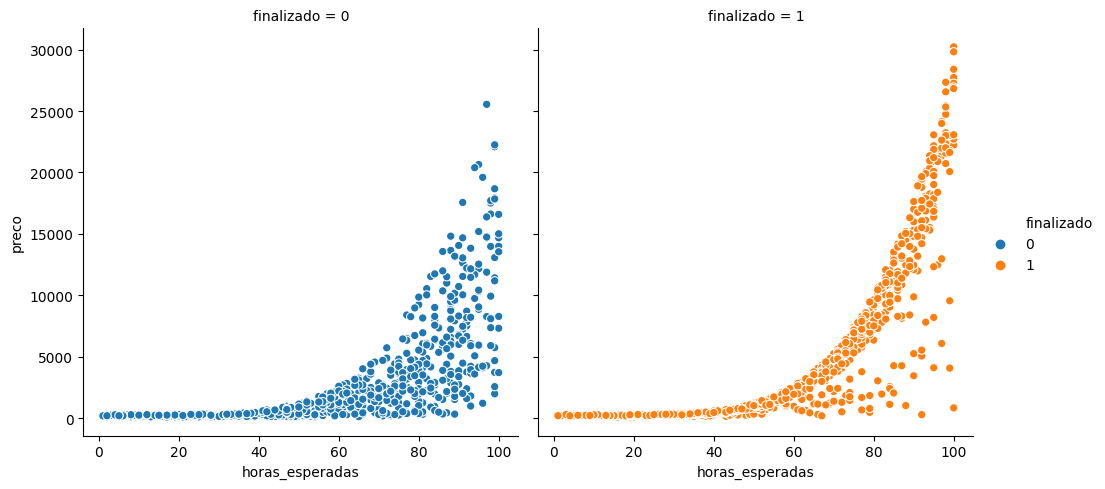

In [7]:
# user o col para mostrar em 2 diferentes
# relplot

sns.relplot(x = "horas_esperadas", y = "preco", hue = "finalizado", col = "finalizado", data = dados)

In [8]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 10

np.random.seed(SEED)      # não precisa mais passar para ninguem a seed

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# LinearSVC() - tem o random nos parametros - não precisa passar por causa do np.random
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.96%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Ter um algoritmo de base

O algoritmo base converte uma coluna deixando somente 0 ou somente 1. Com isso nós implementamos o teste do algoritmo e obtemos o resultado.

In [57]:
# numpy - biblioteca que gera matrizes, trabalha com matrizes

import numpy as np

# algoritimo de base
# meta e conseguir ser melhor que está base

# gerar 540 ums  -  seria chutar 1 para tudo - que daria 52.59%  -  um pouco pior do que treinar
previsoes_base = np.ones(540)

acuracia = accuracy_score(teste_y, previsoes_base) * 100
print("A acurácia da baseline foi %.2f%%" % acuracia)

A acurácia da baseline foi 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

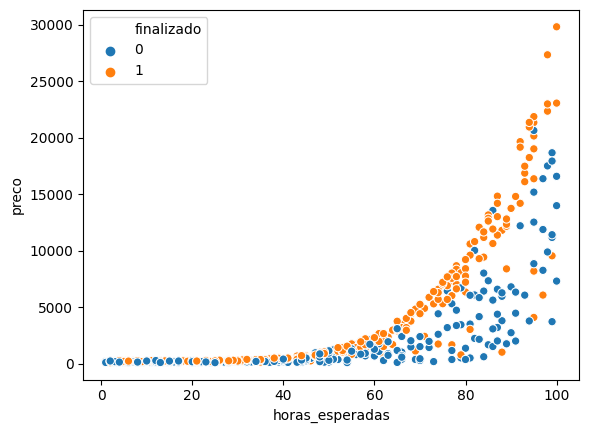

In [58]:
# analizar o teste x

sns.scatterplot(x = "horas_esperadas", y = "preco", hue = teste_y, data = teste_x)

In [59]:
# analize em 2 dimensoes  - cada pixel do grafico e passado para o algoritmo para ele pintar de uma cor, e falar se seria finalizado ou não

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [60]:
pixels = 100

# dividiu o espaço do 0 até o 100 em 100 pedaços, foi somando cada espaço proporcionalmente até chegar no final
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)

eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [61]:
# criar um grid
xx, yy = np.meshgrid(eixo_x, eixo_y)           #  ainda não está mesclado

# mesclar
pontos = np.c_[xx.ravel(), yy.ravel()]      # formou os pares

In [62]:
Z = modelo.predict(pontos)

# redimensionar o Z de acordo com o xx
Z = Z.reshape(xx.shape)

Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

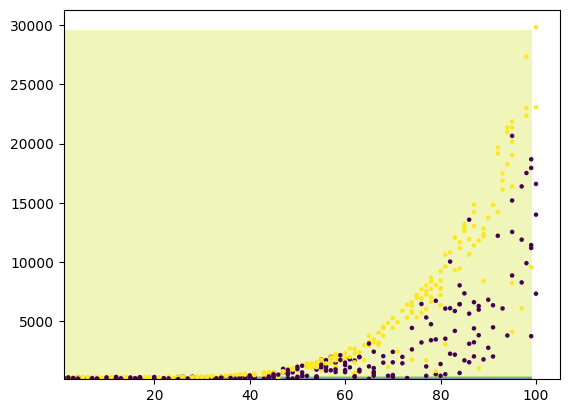

In [63]:
# plotar
import matplotlib.pyplot as plt

# Z - cor definida pelo Z
# curva do algoritimo
plt.contourf(xx, yy, Z, alpha = 0.3)

# pontos jogados
# definir a cor e o  -  c
# definir o tamanho(size) e o  -  s
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s = 5)

#   DECISION BOUNDARY   -   CURVA DE DESISAO

# Usar o que é apenas SVC  -  não linear

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 10

np.random.seed(SEED)      # não precisa mais passar para ninguem a seed

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# LinearSVC() - tem o random nos parametros - não precisa passar por causa do np.random
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 61.85%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


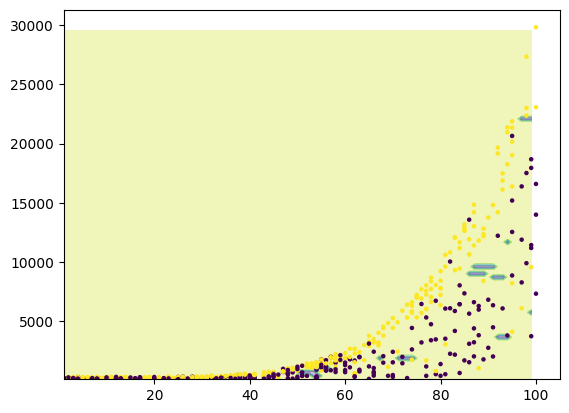

In [68]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)


xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s = 5)

-- reescalar

In [73]:
# escalas distintas causam um balanço no algoritmo     -  0 -> 30000   0 -> 100

# reescalar tudo para uma faixa parecida
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 10

np.random.seed(SEED)      # não precisa mais passar para ninguem a seed

# raw - valor original
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


# pegar os valores de x do treino e criar uma escala nova
scaler = StandardScaler()
# treinar o precesso de escala
scaler.fit(raw_treino_x)
# transformar o treino x, no treino x novo, na escala nova    -   reescala
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 67.41%


In [ ]:
# treino_x          -   é agora um array e arrays
# raw_treino_x      -   era uma pandas   -  que tinha horas_esperadas e preco de forma diferente

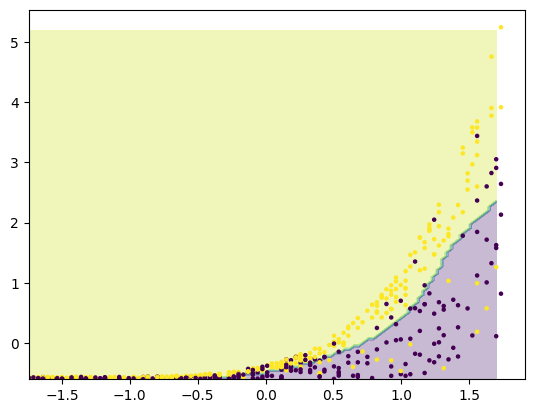

In [77]:
# todas as linha, coluna 0
data_x = teste_x[:, 0]
# todas as linha, coluna 1
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)


xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s = 5)